## Overfiting-Underfiting

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x**2 + b1x + b0 2.derece

3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 3.derece

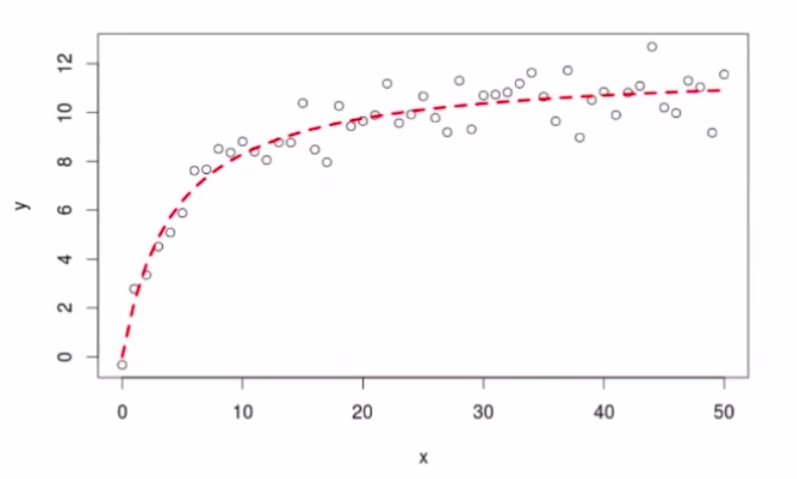

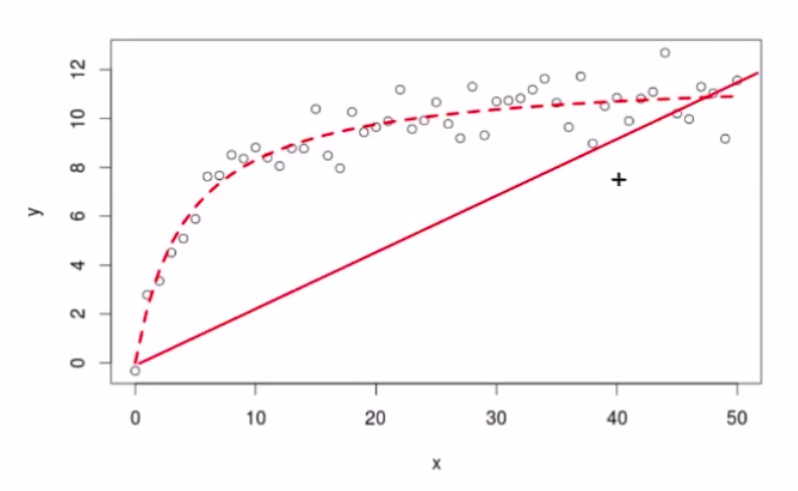

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
data = np.array([[2, 3, 4]])
data

array([[2, 3, 4]])

In [6]:
trans = PolynomialFeatures(degree = 2, include_bias = False)

In [7]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [8]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [10]:
# degree 3 yapınca hem feature sayısı artıyor hemde işlemin yorumlanması zorlaşıyor işler karmaşıklaşıyor
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

## Read Dataset

In [11]:
df = pd.read_csv("Advertising.csv")

In [12]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [13]:
X = df.drop("sales", axis = 1)
y = df.sales

In [14]:
poly_conv = PolynomialFeatures(degree = 2, include_bias = False)

In [15]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [16]:
poly_features = poly_conv.transform(X) ## Polynomial features e çevirdik

In [17]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
poly_features.shape

(200, 9)

In [19]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                      "TV&newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


## Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state= 101)
# X olarak yeni oluşturduğum poly_features datasını veriyoruz. 

In [22]:
model_poly = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
model_poly.fit(X_train, y_train)

In [ ]:
y_pred = model_poly.predict(X_test)

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

In [ ]:
compare.head(20).plot(kind="bar", figsize=(15,9))
plt.show();

## Poly Coefficients katsayılarını bakalım

In [ ]:
model_poly.coef_

In [ ]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])


In [ ]:
df_coef

In [ ]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]]) 

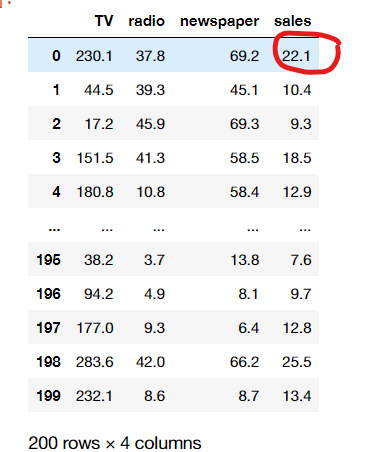

## Evaluation on the Test Set

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = model_poly.predict(X_test)

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

In [ ]:
y_train_pred = model_poly.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred)

## Let's find optimal degree of poly

In [ ]:
def poly(d):
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

In [23]:
poly(10)

NameError: name 'LinearRegression' is not defined